# Udacity Data Science Nano Degree Blog Post

### Import necessary libraries

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

%matplotlib inline

## Data Analysis - CRISP-DM 

### 1. Business Understanding

The data considered in this analysis is the 2020 Stack Overflow survey which can be found at https://insights.stackoverflow.com/survey/

In order to get a better understanding of the differences between Europe and North America as potential labor markets for software developers and data scientists, I would like to analyze this data based on three main questions:

* Question 1: How is the salary of developers distributed in Europe compared to North America?
* Question 2: Is there a similiar correlation between selected factors and the salary in Europe and in North America?
* Question 3: Is there a notable difference in job satisfaction between Europe and North America?

The following analysis will be structured according to the CRISP-DM process and the results can be found on my Medium Blog post at https://flostahl.medium.com/how-does-the-old-world-compare-to-the-new-world-spoken-from-a-software-developers-perspective-ad08489704c2


### 2. Data Understanding

In [62]:
#Read in the data and get a first understanding of it
df_raw = pd.read_csv('developer_survey_2020/survey_results_public.csv')
df_schema = pd.read_csv('developer_survey_2020/survey_results_schema.csv')
df_raw.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

We can see, that there is a total of **64461** responses/samples given in the data. In addition to this, we understand that there are 61 columns in total, consisting of 1 column for the ID and 60 questions. Moreover, it is notable that the different questions were not answered to a similar extent - while most of the participants included answers in categories like ***MainBranch (whether they are a developer by profession or not)*** and ***Country***, especially those questions regarding the participants' financial situation and their compensation remained unanswered by a large share.

In [63]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

For the following analyses, we will not require the entire data but only focus on a number of selected features (questions) that we think, are most relevant for answering our initially posed questions. These features include:

 * **MainBranch** - does the participant work as a professional developer 
 * **Hobbyist** - does the participant consider coding his/her hobby
 * **ConvertedComp** - total amount of annual compensation converted to USD
 * **Country** - in which country does the participant live
 * **EdLevel** - what is the highest educational level of the participant
 * **Employment** - is she/he full-time employed or not
 * **JobSat** - how satisfied is the participant with her/his job
 * **YearsCodePro** - how many years of coding experience does the participant have in his professional career
 

### 3. Data Preparation

In [258]:
#Only select a relevant subset of the columns necessary for the analysis
columns = ['MainBranch', 'Hobbyist', 'ConvertedComp', 'Country', 'EdLevel', 
           'Employment', 'JobSat', 'YearsCodePro'
          ]

df = df_raw[columns]
df.head()

,MainBranch,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,YearsCodePro
0,I am a developer by profession,Yes,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Slightly satisfied,27
1,I am a developer by profession,No,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Very dissatisfied,4
2,I code primarily as a hobby,Yes,NaN,Russian Federation,NaN,NaN,NaN,NaN
3,I am a developer by profession,Yes,NaN,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Slightly dissatisfied,4
4,"I used to be a developer by profession, but no...",Yes,NaN,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,8


We can see that there is a high variance in the number of missing values when comparing different columns of our dataset. The most *limiting* variables seem to be ***ConvertedComp*** and ***CompTotal***. As these, however, are mostly our target variables, we will have to exclude a fairly large share of the available (but incomplete) samples.

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 8 columns):
MainBranch       64162 non-null object
Hobbyist         64416 non-null object
ConvertedComp    34756 non-null float64
Country          64072 non-null object
EdLevel          57431 non-null object
Employment       63854 non-null object
JobSat           45194 non-null object
YearsCodePro     46349 non-null object
dtypes: float64(1), object(7)
memory usage: 3.9+ MB


In [260]:
#Delete incomplete samples by dropping missing values along the 0-axis (rows)
df = df.dropna(axis=0, how="any")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33981 entries, 7 to 64154
Data columns (total 8 columns):
MainBranch       33981 non-null object
Hobbyist         33981 non-null object
ConvertedComp    33981 non-null float64
Country          33981 non-null object
EdLevel          33981 non-null object
Employment       33981 non-null object
JobSat           33981 non-null object
YearsCodePro     33981 non-null object
dtypes: float64(1), object(7)
memory usage: 2.3+ MB


In [199]:
#Convert the string-formated variable JobSat into a numerical variable by mapping integer values to the answers
jobsat = {'Very dissatisfied': 0,
         'Slightly dissatisfied': 1,
         'Neither satisfied nor dissatisfied': 2,
         'Slightly satisfied': 3,
         'Very satisfied': 4,
         np.nan: -1}

#As there are a lot of different possible answers to this questions, we summarize several answers into one category
education = {'I never completed any formal education': 'No higher Education',
            'Primary/elementary school': 'No higher Education',
            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'No higher Education',
            'Some college/university study without earning a degree': 'No higher Education',
            'Associate degree (A.A., A.S., etc.)': 'Associate',
            'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor',
            'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master',
            'Professional degree (JD, MD, etc.)': 'Professional',
            'Other doctoral degree (Ph.D., Ed.D., etc.)': 'PhD'}


df['JobSatisfaction'] = df['JobSat'].apply(lambda x: jobsat[x]).astype('int32')
#pd.to_numeric(df['JobSat'])

df['Education'] = df['EdLevel'].apply(lambda x: education[x])

#In order to convert this variable to a fully numeric one we need to map two of the possible answers to numeric values
#We therefore integrate "Less than 1 year" into the category 0 and "More than 50 years" into 50
df['YearsCodePro'].replace(to_replace='Less than 1 year', value=0, inplace=True)
df['YearsCodePro'].replace(to_replace='More than 50 years', value=50, inplace=True)
df['YearsCodePro'] = df['YearsCodePro'].astype('float')

In order to perform the following and aspired comparison and analyses between Europe and North America, it is, firstly, crucial to define the two regions. For the conducted analyses, we will use the following definitions.

**North America**: United States, Canada

**Europe**: Austria, Italy, Belgium, Latvia, Bulgaria, Lithuania, Croatia, Luxembourg, Cyprus, Malta, Czech Republic, Netherlands, Denmark, Poland, Estonia, Portugal, Finland, Romania, France, Slovakia, Germany, Slovenia, Greece, Spain, Hungary, Sweden, Ireland, United Kingdom (These are the official 27 member states of the EU plus the United Kingdom)

In [200]:
#Creating a new variable 'Region' as defined by above defintion
Europe = 'Austria, Italy, Belgium, Latvia, Bulgaria, Lithuania, Croatia, Luxembourg, Cyprus, Malta, Czech Republic, Netherlands, Denmark, Poland, Estonia, Portugal, Finland, Romania, France, Slovakia, Germany, Slovenia, Greece, Spain, Hungary, Sweden, Ireland, United Kingdom'.split(sep=', ')
North_America = ['United States', 'Canada']
    
#Add a new catagory seperating by region
df['Region'] = df['Country'].apply(lambda x: 'Europe' if x in Europe 
                                         else ('North America' if x in North_America else 'Other'))

In [201]:
#Filter the data to only include full-time employed participants who live in Europe or North America and are professional developers
df = df[columns]
df = df[(df['Employment'] == 'Employed full-time') & 
        (df['Region'] != 'Other') & 
        (df['MainBranch'] == 'I am a developer by profession')]

In [202]:
df.head()

,MainBranch,Hobbyist,Age1stCode,ConvertedComp,Country,Region,DevType,Education,Employment,JobSatisfaction,Overtime,WorkWeekHrs,YearsCodePro
7,I am a developer by profession,Yes,12,116000.0,United States,North America,"Developer, back-end;Developer, desktop or ente...",Bachelor,Employed full-time,1,2,39.0,13
9,I am a developer by profession,Yes,14,32315.0,United Kingdom,Europe,"Database administrator;Developer, full-stack;D...",Master,Employed full-time,4,4,36.0,4
10,I am a developer by profession,Yes,13,40070.0,United Kingdom,Europe,"Developer, back-end;Developer, desktop or ente...",Bachelor,Employed full-time,1,1,40.0,2
11,I am a developer by profession,No,42,14268.0,Spain,Europe,"Designer;Developer, front-end",No higher Education,Employed full-time,0,1,40.0,7
13,I am a developer by profession,Yes,13,66000.0,United States,North America,"Developer, desktop or enterprise applications;...",Associate,Employed full-time,3,2,40.0,1


### 4. Modeling

#### Question 1: How is the salary of developers distributed in Europe compared to North America?

In [203]:
#Get a first feeling of the distribution of the target variable 
df['ConvertedComp'].describe()

count    1.723900e+04
mean     1.368039e+05
std      2.692507e+05
min      0.000000e+00
25%      4.540100e+04
50%      7.109300e+04
75%      1.150000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [204]:
def quant(col, quants = [.05,.1,.25,.75,.9,.95]):
    results = []
    for quant in quants:
        results.append(np.quantile(col, quant))
    
    return results

In [205]:
df.groupby('Region')['ConvertedComp'].agg([np.max, np.min, np.mean, np.median, quant])

,amax,amin,mean,median,quant
Region,,,,,
Europe,2000000.0,0.0,87659.17432,51704.0,"[17508.0, 23688.0, 36193.0, 71129.0, 104777.5,..."
North America,2000000.0,0.0,198943.33850,110000.0,"[49160.0, 60000.0, 79413.0, 150000.0, 237000.0..."


We can see that there is an extreme variance in the **Compensation** variable. This means that there are several extreme outliers. In order to account for this fact, two measures will be taken for the further analysis and the upcoming visualizations. 
* We will use the **median** instead of the **mean** to assess average salaries in order to be less prone to outliers
* For the visualizations we will exclude the top 10% quantile in order to not distord the image 

In [251]:
#Calculate the median salaries
df.groupby('Region')['ConvertedComp'].median()

Region
Europe            51704.0
North America    110000.0
Name: ConvertedComp, dtype: float64

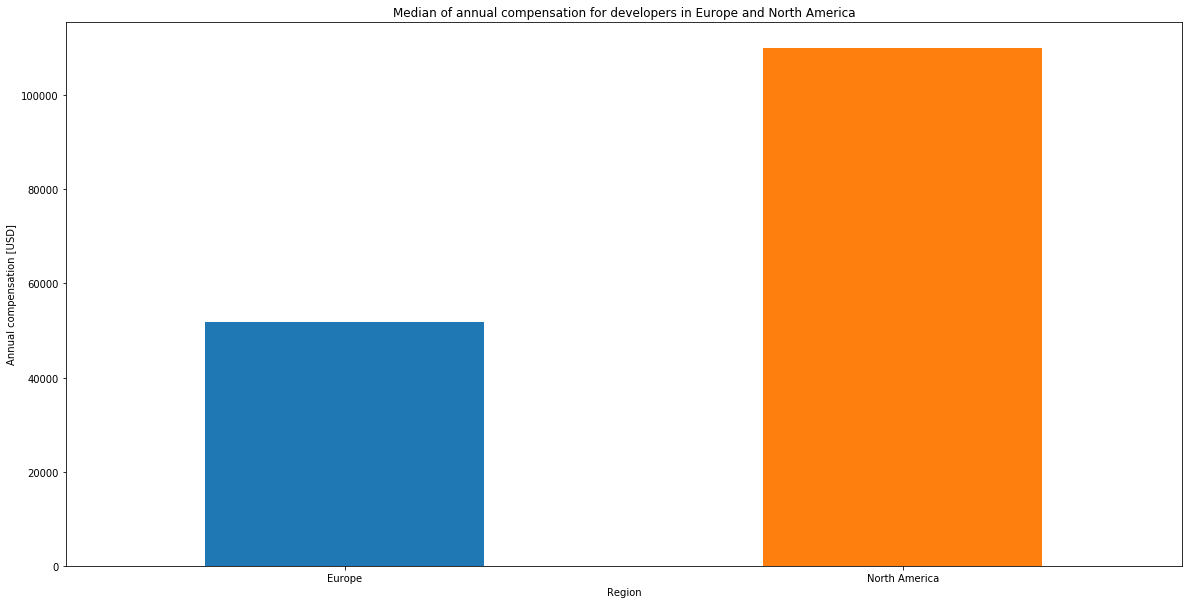

In [250]:
#Visualize the average (median) salary for both regions using a bar chart
plt.figure(figsize=(20,10))
df.groupby('Region')['ConvertedComp'].median().plot.bar(
    title='Median of annual compensation for developers in Europe and North America', 
    rot=0);
plt.ylabel('Annual compensation [USD]');
plt.savefig('Salary_Median.png')

We can easily see, that the average annual compensation in North America is much higher. With **110.000 USD**, the average developer in Canada and the USA earns more than twice as much as their counterparts in Europe, who make an average annual salary of approx. **51.000 USD**. Note, that we considered the median instead of the arithmetic mean in order to be less prone to outliers. 
As this analysis, however, only provides a very limited view on the salary differences between the two regions, it might be valuable to take a closer look at the numbers and the actual distribution of the income.

In [261]:
#Plot the distribution of the salaries by the two different regions
plt.figure(figsize=(20,10))
df.groupby('Region').apply(lambda x: x[(x['ConvertedComp'] <= np.quantile(x['ConvertedComp'], 0.9))]).groupby('Region')['ConvertedComp'].plot.hist(
    title='Distribution of annual compensation for developers in Europe and North America',
    legend=True,
    alpha=.8,
    bins=20);
plt.xlabel('Annual compensation [USD]');
plt.ylabel('Number of participants');

plt.savefig('Salary_Dist.png')

KeyError: 'Region'

<Figure size 1440x720 with 0 Axes>

This visualization allows for a more sophisticated analysis of the situation. In essence, however, we can assess that salaries in the US and Canada all in all tend to be higher for software developers and in addition to that, that there also is a wider range of how much you can earn. This is perfectly in line with what the median analysis has suggested.

#### Question 2: Is there a similiar correlation between selected factors and the salary in Europe and in North America?

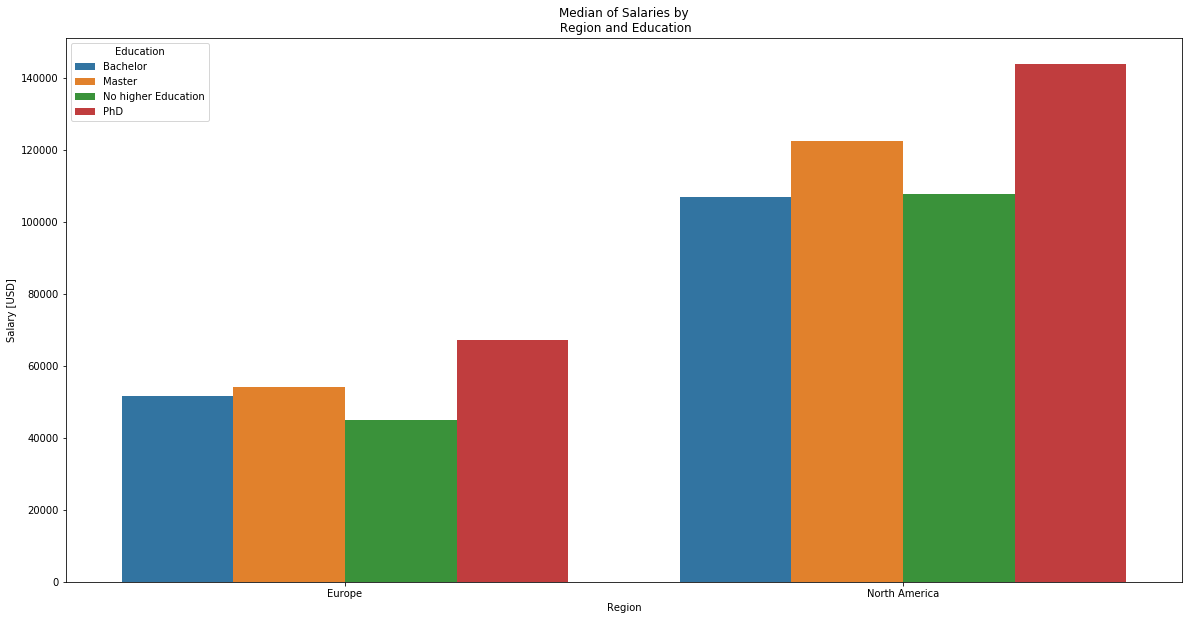

In [254]:
#For this visualization we first create a copy of the dataframe. Afterwards we segregate the data by region and also by the 
# level of education in order to assess the salary differences

salary_academics = df.copy()

salary_academics = salary_academics[salary_academics['Education'].isin(["No higher Education", "Bachelor","Master",
                                                                              'PhD'])]   

salary_academics_plot = salary_academics.groupby(['Region','Education'])['ConvertedComp'].median().reset_index()

plt.figure(figsize=(20,10))

sns.barplot(x = 'Region', y = 'ConvertedComp', hue = 'Education', data = salary_academics_plot)
plt.title('Median of Salaries by\n Region and Education');
plt.ylabel('Salary [USD]');
plt.savefig('Salary_Ed.png')

As we have seen in the previous section, the salary level in North America is higher than in Europe. This begs the question whether it also depends on the same factors and if selected factors have a similar impact on it. It is easy to see that in Europe, education seems to play a substantial role. We can see an easily expected growth of salaray depenend on the level of higher education. The higher your level of education the more you earn (on average). 
In North America the situation seems pretty similar at first sight - a Master's Degree gets you more than a Bachelor's Degree and if you want even more money, I would probably advise you to get a doctorial degree as developers with this level of education earn most on average. What is surprising, however, is the fact that the North American labor market doesn't seem to make a big difference between a Bachelor's Degree and no degree. On average, software developers without any higher education seem to earn just about as much as those, who have completed their udergrad studies.

In [213]:
salary_years = df.copy()

# As before, to protect ourselfs from outliers, we will use median as our base of measure
salary_years = salary_years.groupby(['Region','YearsCodePro'])['ConvertedComp'].median().reset_index()

# Since we want to calculate change, it is easier if we separate two regions
sy_Europe = salary_years[salary_years['Region'] == 'Europe']
sy_North = salary_years[salary_years['Region'] == 'North America']

# We want the total change over time, so we calculate the cumulative change rate
sy_Europe['change'] = sy_Europe['ConvertedComp'].pct_change().cumsum()
sy_North['change'] = sy_North['ConvertedComp'].pct_change().cumsum() 

# We join both dataframes 
salary_years = pd.concat([sy_Europe,sy_North])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


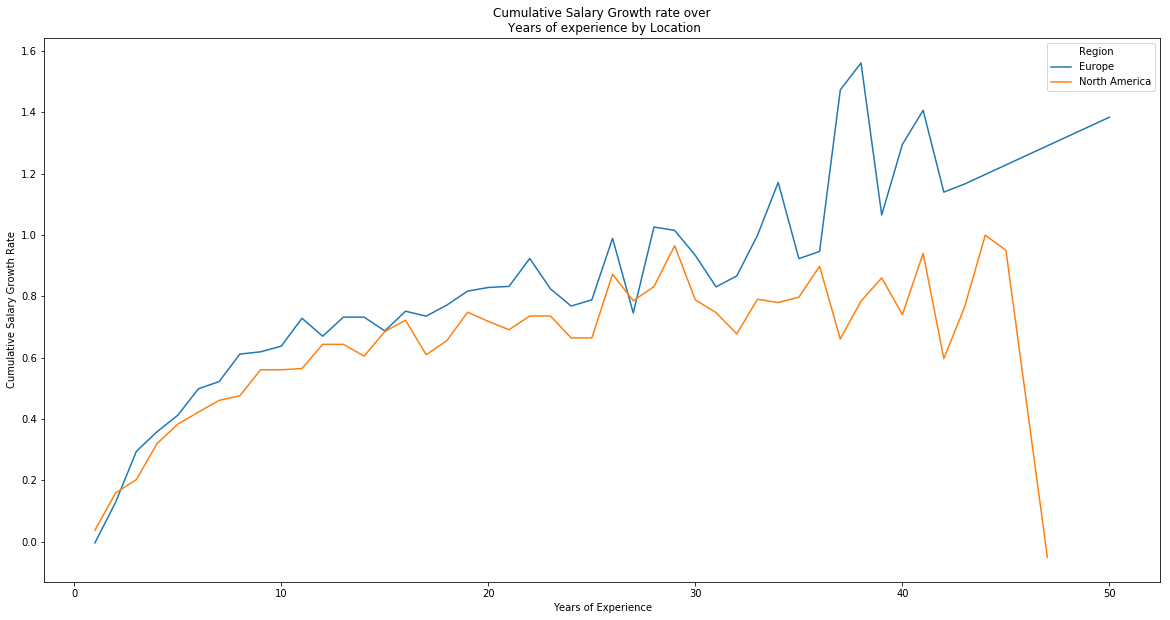

In [255]:
#Now we visualize the cumulative salary growth based on the number of years of professional coding experience
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="YearsCodePro", y="change", hue="Region", data=salary_years)
plt.title('Cumulative Salary Growth rate over\n Years of experience by Location')
plt.ylabel('Cumulative Salary Growth Rate')
plt.xlabel('Years of Experience');
plt.savefig('Salary_Experience.png')

For the second factor studied in this analysis, a more similar picture results from the data between North America and Europe. In both regions the level on coding experience seems to have a constant positive effect on the employee's salary. Only after 40 or so years of professional experience the North American employers do not seem to value more experience the same way their European counterparts do. The salary growth after 40 years of experience seems to stagnate in the new world while European employers still reward their most experienced ones even further.

#### Question 3: Is there a notable difference in job satisfaction between Europe and North America?

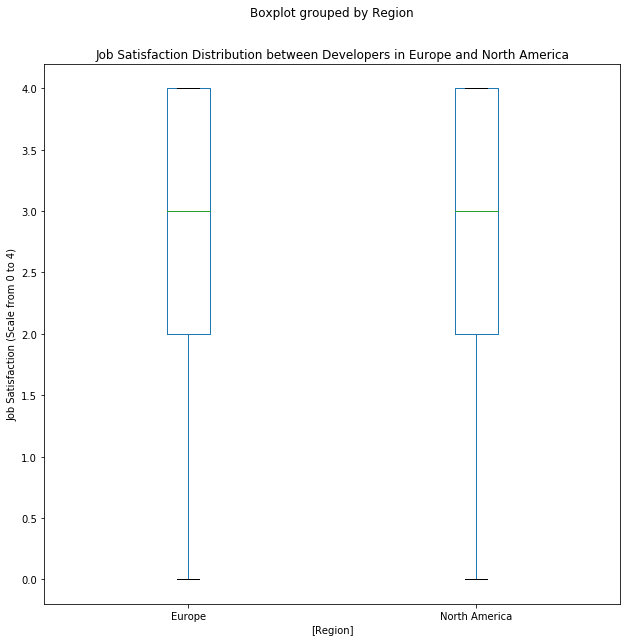

In [256]:
#Using Box Plots to analyze the different satisfaction distributions for both Europe and North America
df.boxplot(by = ['Region'], column = 'JobSatisfaction',grid=False, fontsize=10, figsize=(10,10));
plt.title('Job Satisfaction Distribution between Developers in Europe and North America');
plt.ylabel('Job Satisfaction (Scale from 0 to 4)');
plt.savefig('Satisfaction.png')

Last but not least, it is time to raise one of the most interesting questions for me and to take a look at the satisfaction of American and European software developers to finally figure out, which place is the true El-Dorado for our kind. Therefore we look at a Box Plot of the satisfaction levels in both North America and Europe. Surprisingly, they look just the same and therefore do not allow us to answer this question in favor of any of the regions. Both, American and European developers seem to be pretty satisfied with their jobs and would rate it 3 out of 4.

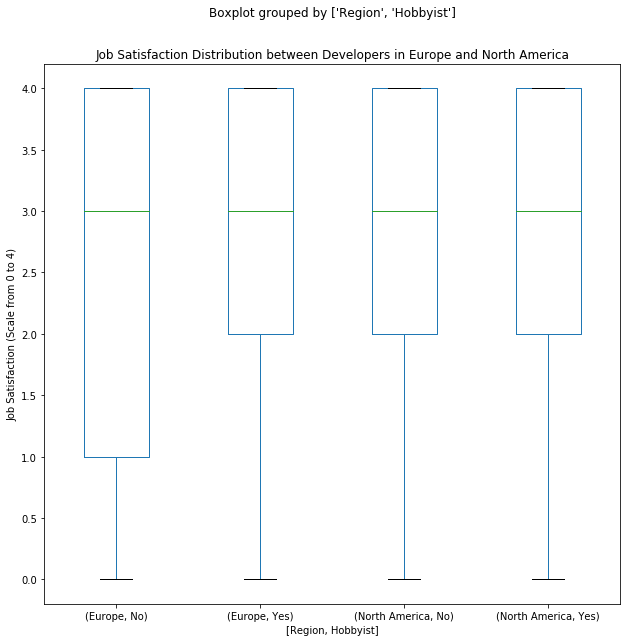

In [257]:
#As the previous analysis was not very beneficial we further analyze the impact of the variable "Hobbyist" on the extent of satisfaction
df.boxplot(by = ['Region', 'Hobbyist'], column = 'JobSatisfaction',grid=False, fontsize=10, figsize=(10,10));
plt.title('Job Satisfaction Distribution between Developers in Europe and North America');
plt.ylabel('Job Satisfaction (Scale from 0 to 4)');
plt.savefig('Satisfaction_Hobby.png')

Given this almost identical picture, it is even more interesting to analyze how the fact that a developer also considers coding her hobby, affects their level of job satisfaction. Therefore, we split up the Box plots not only by region but also by the variable Hobbyist. Here we can see a new information. People who do not consider coding their hobby tend to be less satisfied with their developer job in Europe than they are in North America which is a very interesting find.


## Conclusion

We have studied the data of the the 2020 Stack Overflow survey, we raised 3 specific questions to help study the differences between North America and Europe from a software developer's perspective. This is what we have concluded for each question
* How is the salary of developers distributed in Europe compared to North America?
We discovered that North America has the higher average salary, regardless if you have a bachelor's, master's or PhD degree. Overall, the distribution of salaries in America is shifted to the right and also has a wider range.
* Is there a similiar correlation between selected factors and the salary in Europe and in North America?
Not only do the salaries in both regions follow the same pattern regarding education but also with respect to the employee's seniority. In both regions the level of education has a positive impact on the salary and also the level of professional coding experience. Only at a very high level of experience, the marginal benefit of experience tends to sink in Canada and the US.
* Is there a notable difference in job satisfaction between Europe and North America?
Not really…however, an interesting take-away is that in case you do not consider yourself a hobby programmer, you should seriously think about moving to the US or Canada.

Long story short, analyzing the 2020 Stack Overflow survey data allowed us to take a closer look into the labor market situation for software developers in Europe and North America. We were able to discover some interesting findings and are now able to have a better understanding of the similarities and differences of these two regions.